In [3]:
pip install hdbscan

     |████████████████████████████████| 3.7 MB 77 kB/s eta 0:00:014
Note: you may need to restart the kernel to use updated packages.


Nombre d'états identifiés : 7
Puissances effectives des états :
État 1: 7.00 W
État 2: 1.00 W
État 3: 0.00 W
État 4: 140.00 W
État 5: 124.00 W
État 6: 131.00 W
État 7: 127.00 W


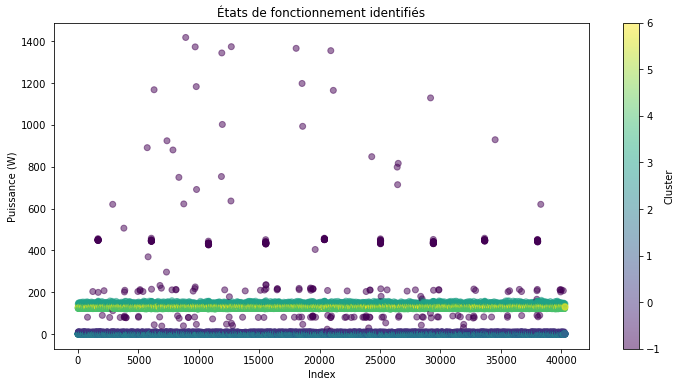

Séquence d'états : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 6, 6, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 5, 5, 6, 6, 4, 4, 4, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]


In [18]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('ampds.csv')

# Préparation des données
X = data['FGE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=1000, min_samples=1)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")



# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Index')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états :", state_sequence[:100])  # Affiche les 100 premiers états

In [ ]:
# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

Nombre d'états identifiés : 5
Puissances effectives des états :
État 1: 5.33 W
État 2: 135.59 W
État 3: 81.77 W
État 4: 211.43 W
État 5: 441.46 W


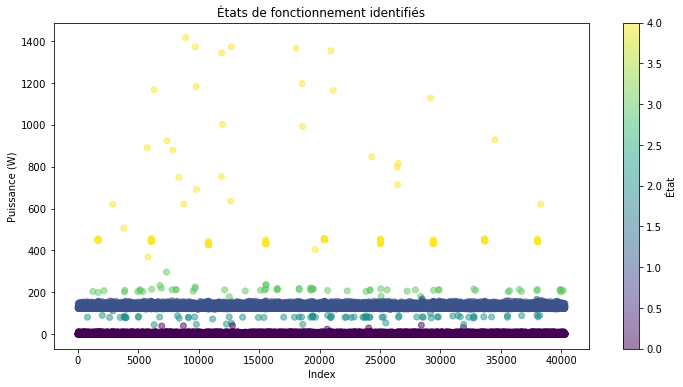

Séquence d'états : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Chargement des données
data = pd.read_csv('ampds.csv')
X = data['FGE'].values.reshape(-1, 1)

# Fonction pour fusionner les clusters proches
def merge_close_clusters(centers, threshold):
    linkage_matrix = linkage(centers.reshape(-1, 1), method='single')
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')
    merged_centers = [centers[clusters == i].mean() for i in range(1, clusters.max() + 1)]
    return np.array(merged_centers).reshape(-1, 1)

# Paramètres
min_cluster_size = 50
min_samples = 10
merge_threshold = 10  # Seuil de fusion en watts

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
cluster_labels = clusterer.fit_predict(X)

# Calcul des centres de clusters
unique_labels = np.unique(cluster_labels)
cluster_centers = np.array([X[cluster_labels == label].mean() for label in unique_labels if label != -1]).reshape(-1, 1)

# Fusion des clusters proches
merged_centers = merge_close_clusters(cluster_centers, merge_threshold)

# Réassignation des labels
new_labels = np.argmin(np.abs(X - merged_centers.T), axis=1)

# Affichage des résultats
print(f"Nombre d'états identifiés : {len(merged_centers)}")
print("Puissances effectives des états :")
for i, power in enumerate(merged_centers):
    print(f"État {i+1}: {power[0]:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, X, c=new_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Index')
plt.ylabel('Puissance (W)')
plt.colorbar(label='État')
plt.show()

# Séquence d'états
state_sequence = [new_labels[i] for i in range(len(new_labels))]
print("Séquence d'états :", state_sequence[:100])  # Affiche les 100 premiers états

Nombre d'états identifiés : 6
Puissances effectives des états :
État 0: 0.00 W
État 1: 5.33 W
État 2: 81.77 W
État 3: 135.59 W
État 4: 211.43 W
État 5: 441.46 W


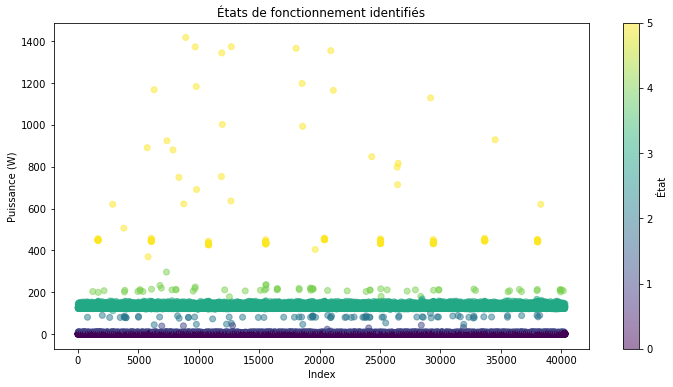

Séquence d'états : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Chargement des données
data = pd.read_csv('ampds.csv')
X = data['FGE'].values.reshape(-1, 1)

# Fonction pour fusionner les clusters proches
def merge_close_clusters(centers, threshold):
    linkage_matrix = linkage(centers.reshape(-1, 1), method='single')
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')
    merged_centers = [centers[clusters == i].mean() for i in range(1, clusters.max() + 1)]
    return np.array(merged_centers).reshape(-1, 1)

# Paramètres
min_cluster_size = 50
min_samples = 10
merge_threshold = 10  # Seuil de fusion en watts

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
cluster_labels = clusterer.fit_predict(X)

# Calcul des centres de clusters
unique_labels = np.unique(cluster_labels)
cluster_centers = np.array([X[cluster_labels == label].mean() for label in unique_labels if label != -1]).reshape(-1, 1)

# Ajout explicite de l'état 0
if 0 not in cluster_centers:
    cluster_centers = np.vstack([np.array([[0]]), cluster_centers])

# Fusion des clusters proches
merged_centers = merge_close_clusters(cluster_centers, merge_threshold)

# Assurez-vous que l'état 0 est toujours présent après la fusion
if 0 not in merged_centers:
    merged_centers = np.vstack([np.array([[0]]), merged_centers])

# Tri des centres fusionnés
merged_centers = np.sort(merged_centers, axis=0)

# Réassignation des labels
new_labels = np.argmin(np.abs(X - merged_centers.T), axis=1)

# Affichage des résultats
print(f"Nombre d'états identifiés : {len(merged_centers)}")
print("Puissances effectives des états :")
for i, power in enumerate(merged_centers):
    print(f"État {i}: {power[0]:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, X, c=new_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Index')
plt.ylabel('Puissance (W)')
plt.colorbar(label='État')
plt.show()

# Séquence d'états
state_sequence = [new_labels[i] for i in range(len(new_labels))]
print("Séquence d'états :", state_sequence[:100])  # Affiche les 100 premiers états

In [24]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Chargement des données
# Supposons que vos données sont dans un fichier CSV avec une colonne 'timestamp' et une colonne 'power'
data = pd.read_csv('ampds.csv')

# Vérification du chargement des données
print(data.head())

# Préparation des données
# Reshape des données pour qu'elles soient au format attendu par HDBSCAN (n_samples, n_features)
X = data['FGE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=50, min_samples=10)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


                  time  WHE  RSE  GRE  MHE  B1E  BME  CWE  DWE  EQE  ...  WOE  \
0  1333263600000000000  918   43    2  873    0  352    0    0   41  ...    0   
1  1333263660000000000  913   43    0  870    0  354    0    0   35  ...    0   
2  1333263720000000000  872   43    2  827    0  354    0    0   41  ...    0   
3  1333263780000000000  872   43    2  827    0  354    0    0   40  ...    0   
4  1333263840000000000  772   41    2  729    0  352    0    0   40  ...    0   

   B2E  CDE  DNE  EBE  FGE  HTE  OUE  TVE  UNE  
0   58    0   30    0    0    4    0   37  138  
1   58    0   30    0    0    4    0   37  138  
2    8    0   30    0    0    4    0   37  138  
3    7    0   30    0    0    4    0   37  142  
4    8    0   31    0    0    4    0   37   45  

[5 rows x 24 columns]
Nombre d'états identifiés : 39
Puissances effectives des états :
État 1: 444.00 W
État 2: 211.00 W
État 3: 80.00 W
État 4: 1.00 W
État 5: 0.00 W
État 6: 10.00 W
État 7: 124.00 W
État 8: 125.00 W
É

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 864x432 with 0 Axes>

                  time  WHE  RSE  GRE  MHE  B1E  BME  CWE  DWE  EQE  ...  WOE  \
0  1333263600000000000  918   43    2  873    0  352    0    0   41  ...    0   
1  1333263660000000000  913   43    0  870    0  354    0    0   35  ...    0   
2  1333263720000000000  872   43    2  827    0  354    0    0   41  ...    0   
3  1333263780000000000  872   43    2  827    0  354    0    0   40  ...    0   
4  1333263840000000000  772   41    2  729    0  352    0    0   40  ...    0   

   B2E  CDE  DNE  EBE  FGE  HTE  OUE  TVE  UNE  
0   58    0   30    0    0    4    0   37  138  
1   58    0   30    0    0    4    0   37  138  
2    8    0   30    0    0    4    0   37  138  
3    7    0   30    0    0    4    0   37  142  
4    8    0   31    0    0    4    0   37   45  

[5 rows x 24 columns]
Nombre d'états identifiés : 39
Puissances effectives des états :
État 1: 444.00 W
État 2: 211.00 W
État 3: 80.00 W
État 4: 1.00 W
État 5: 0.00 W
État 6: 10.00 W
État 7: 124.00 W
État 8: 125.00 W
É

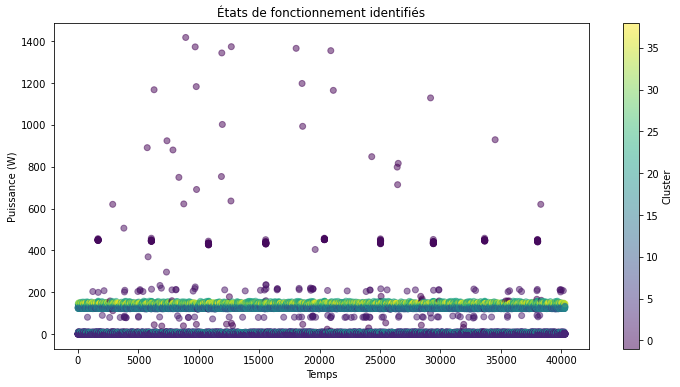

Séquence d'états (premiers 100 états) : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 25, 12, 19, 19, 7, 6, 18, 17, 17, 4, 4, 4, 4, 4, 5, -1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 8, 16, 8, 8, 31, 27, 21, 24, 23, 23, 14, 14, 14, 13, 12, 12, 12, 12, 11, 11, 16, 16, 16, 16, 16, 16, 16, 16, 5, 31, 21, 13, 11, 12, 20, 19, 6, 18, 17, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4]


In [25]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('ampds.csv')

# Vérification du chargement des données
print(data.head())

# Préparation des données
# Reshape des données pour qu'elles soient au format attendu par HDBSCAN (n_samples, n_features)
X = data['FGE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=50, min_samples=10)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


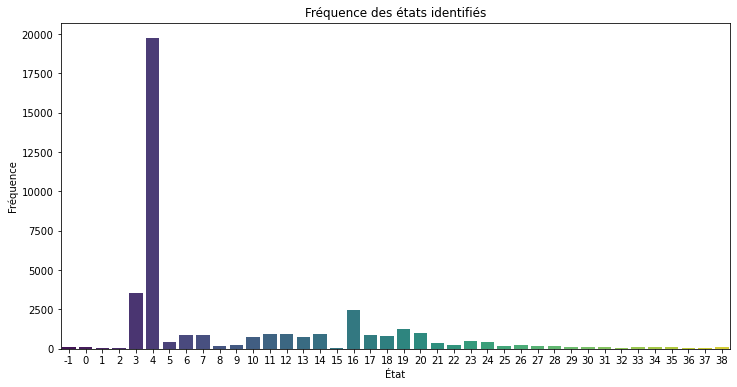

In [26]:
import seaborn as sns

# Histogramme des états
plt.figure(figsize=(12, 6))
sns.countplot(cluster_labels, palette='viridis')
plt.title('Fréquence des états identifiés')
plt.xlabel('État')
plt.ylabel('Fréquence')
plt.show()


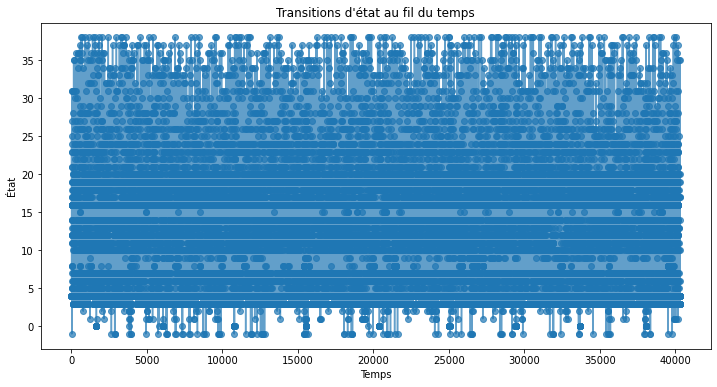

In [27]:
# Visualisation des transitions d'état
plt.figure(figsize=(12, 6))
plt.plot(data.index, cluster_labels, marker='o', linestyle='-', alpha=0.7)
plt.title('Transitions d\'état au fil du temps')
plt.xlabel('Temps')
plt.ylabel('État')
plt.show()


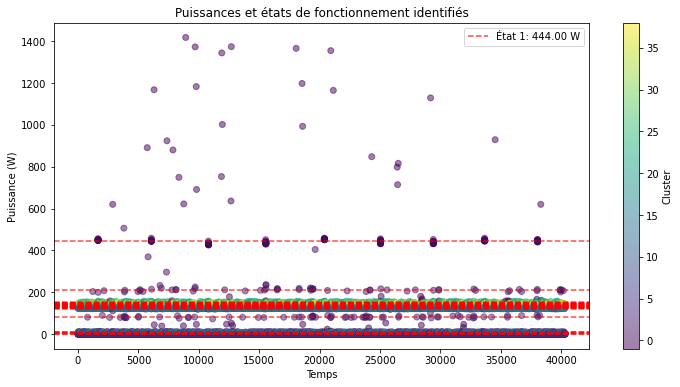

In [28]:
# Visualisation combinée des puissances et des états
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
for i, power in enumerate(power_states):
    plt.axhline(y=power, color='r', linestyle='--', alpha=0.7, label=f'État {i+1}: {power:.2f} W' if i == 0 else "")

plt.title('Puissances et états de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


                  time  WHE  RSE  GRE  MHE  B1E  BME  CWE  DWE  EQE  ...  WOE  \
0  1333263600000000000  918   43    2  873    0  352    0    0   41  ...    0   
1  1333263660000000000  913   43    0  870    0  354    0    0   35  ...    0   
2  1333263720000000000  872   43    2  827    0  354    0    0   41  ...    0   
3  1333263780000000000  872   43    2  827    0  354    0    0   40  ...    0   
4  1333263840000000000  772   41    2  729    0  352    0    0   40  ...    0   

   B2E  CDE  DNE  EBE  FGE  HTE  OUE  TVE  UNE  
0   58    0   30    0    0    4    0   37  138  
1   58    0   30    0    0    4    0   37  138  
2    8    0   30    0    0    4    0   37  138  
3    7    0   30    0    0    4    0   37  142  
4    8    0   31    0    0    4    0   37   45  

[5 rows x 24 columns]
Nombre d'états identifiés : 6
Puissances effectives des états :
État 1: 7.00 W
État 2: 1.00 W
État 3: 0.00 W
État 4: 132.00 W
État 5: 123.00 W
État 6: 127.00 W


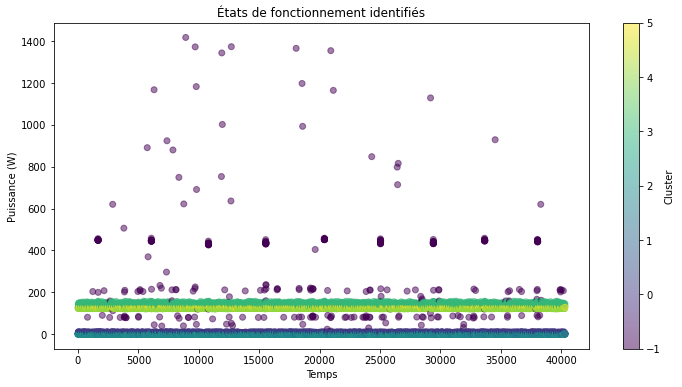

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


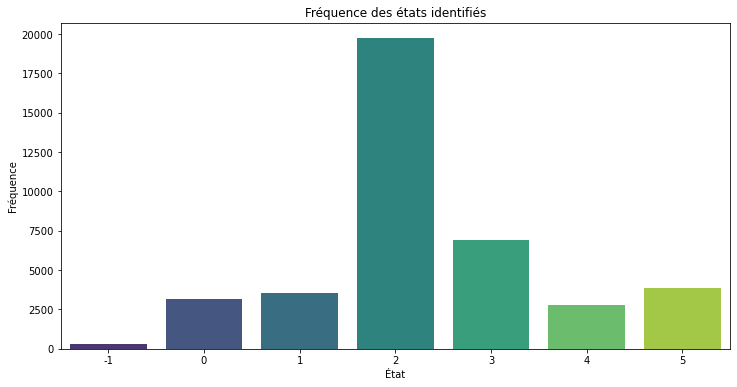

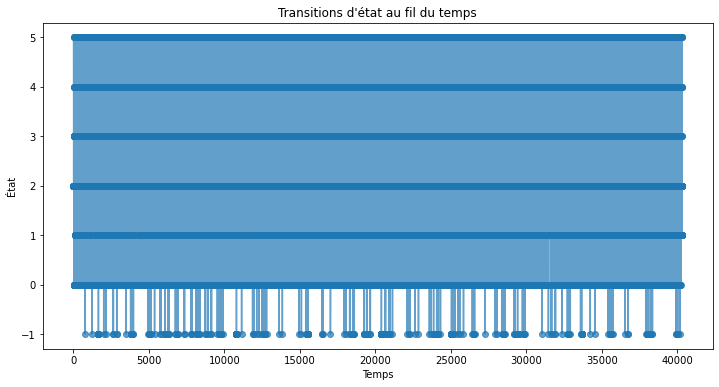

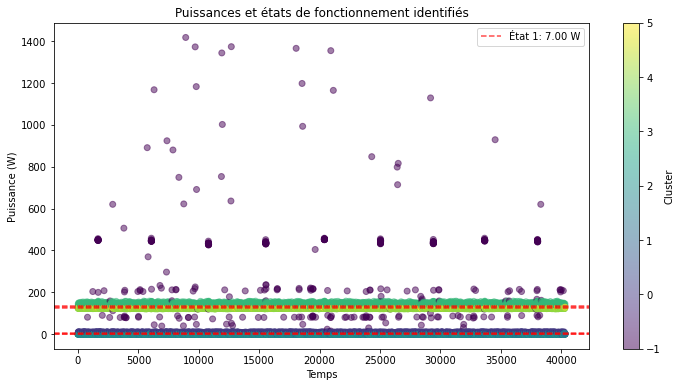

Séquence d'états (premiers 100 états) : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 5, 5, 4, 4, 4, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]


In [33]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('ampds.csv')

# Vérification du chargement des données
print(data.head())

# Préparation des données
X = data['FGE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=1000, min_samples=10)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Histogramme des états
plt.figure(figsize=(12, 6))
sns.countplot(cluster_labels, palette='viridis')
plt.title('Fréquence des états identifiés')
plt.xlabel('État')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des transitions d'état
plt.figure(figsize=(12, 6))
plt.plot(data.index, cluster_labels, marker='o', linestyle='-', alpha=0.7)
plt.title('Transitions d\'état au fil du temps')
plt.xlabel('Temps')
plt.ylabel('État')
plt.show()

# Visualisation combinée des puissances et des états
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
for i, power in enumerate(power_states):
    plt.axhline(y=power, color='r', linestyle='--', alpha=0.7, label=f'État {i+1}: {power:.2f} W' if i == 0 else "")

plt.title('Puissances et états de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


Nombre d'états identifiés : 31
Puissances effectives des états :
État 1: 444.00 W
État 2: 10.00 W
État 3: 1.00 W
État 4: 0.00 W
État 5: 6.00 W
État 6: 7.00 W
État 7: 138.00 W
État 8: 147.00 W
État 9: 148.00 W
État 10: 153.00 W
État 11: 140.00 W
État 12: 136.00 W
État 13: 137.00 W
État 14: 135.00 W
État 15: 141.00 W
État 16: 129.00 W
État 17: 130.00 W
État 18: 131.00 W
État 19: 132.00 W
État 20: 133.00 W
État 21: 134.00 W
État 22: 142.00 W
État 23: 143.00 W
État 24: 127.00 W
État 25: 128.00 W
État 26: 123.00 W
État 27: 121.00 W
État 28: 122.00 W
État 29: 126.00 W
État 30: 124.00 W
État 31: 125.00 W


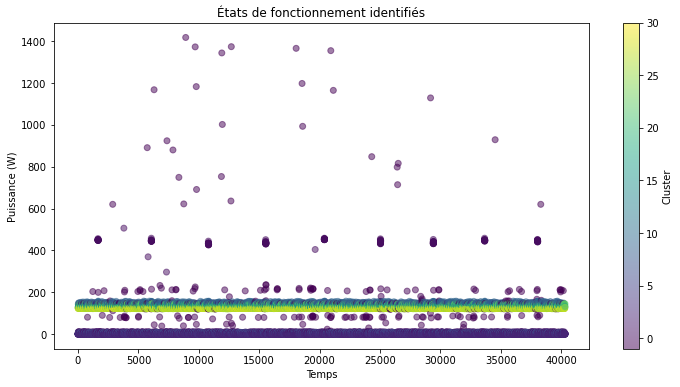

In [30]:
# Application de HDBSCAN avec des paramètres ajustés
clusterer = HDBSCAN(min_cluster_size=100, min_samples=20)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()


Nombre d'états identifiés après regroupement : 5
Nouvelles puissances effectives des états :
État 1: 132.00 W
État 2: 444.00 W
État 3: 0.00 W
État 4: 144.00 W
État 5: 126.00 W


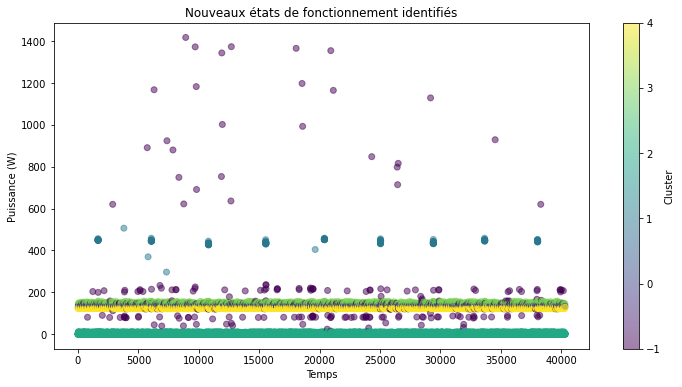

In [31]:
from sklearn.cluster import KMeans

# Appliquer KMeans pour regrouper les puissances effectives
n_clusters_final = 5  # Définir le nombre final de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters_final)
final_labels = kmeans.fit_predict(np.array(power_states).reshape(-1, 1))

# Mettre à jour les étiquettes des clusters avec les nouvelles étiquettes KMeans
new_cluster_labels = np.array([final_labels[label] if label != -1 else -1 for label in cluster_labels])

# Analyse des nouveaux clusters
n_clusters_new = len(set(new_cluster_labels)) - (1 if -1 in new_cluster_labels else 0)
print(f"Nombre d'états identifiés après regroupement : {n_clusters_new}")

# Extraction des nouvelles puissances effectives des états
new_power_states = []
for i in range(n_clusters_new):
    cluster_power = X[new_cluster_labels == i]
    new_power_states.append(np.median(cluster_power))

# Affichage des nouvelles puissances effectives des états
print("Nouvelles puissances effectives des états :")
for i, power in enumerate(new_power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation des nouveaux clusters
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['FGE'], c=new_cluster_labels, cmap='viridis', alpha=0.5)
plt.title('Nouveaux états de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()


                  time  WHE  RSE  GRE  MHE  B1E  BME  CWE  DWE  EQE  ...  WOE  \
0  1333263600000000000  918   43    2  873    0  352    0    0   41  ...    0   
1  1333263660000000000  913   43    0  870    0  354    0    0   35  ...    0   
2  1333263720000000000  872   43    2  827    0  354    0    0   41  ...    0   
3  1333263780000000000  872   43    2  827    0  354    0    0   40  ...    0   
4  1333263840000000000  772   41    2  729    0  352    0    0   40  ...    0   

   B2E  CDE  DNE  EBE  FGE  HTE  OUE  TVE  UNE  
0   58    0   30    0    0    4    0   37  138  
1   58    0   30    0    0    4    0   37  138  
2    8    0   30    0    0    4    0   37  138  
3    7    0   30    0    0    4    0   37  142  
4    8    0   31    0    0    4    0   37   45  

[5 rows x 24 columns]
Nombre d'états identifiés : 9
Puissances effectives des états :
État 1: 753.00 W
État 2: 478.00 W
État 3: 138.00 W
État 4: 7.00 W
État 5: 0.00 W
État 6: 3.00 W
État 7: 2.00 W
État 8: 13.00 W
État 

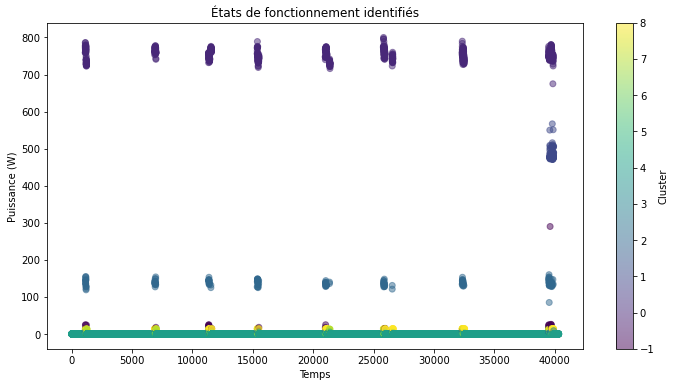

Séquence d'états (premiers 100 états) : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


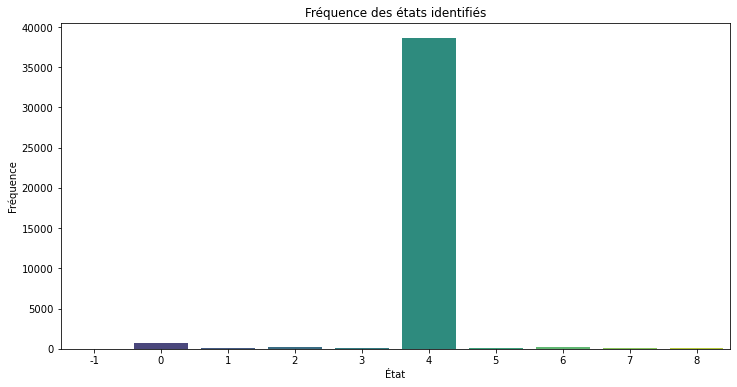

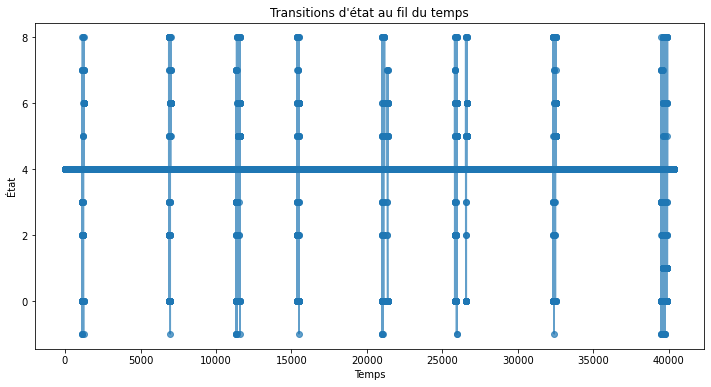

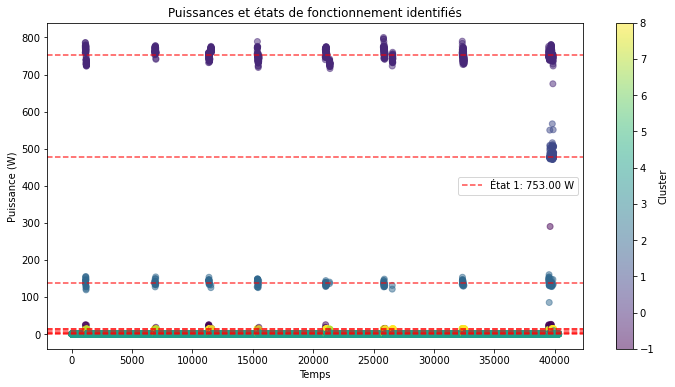

Séquence d'états (premiers 100 états) : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [46]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('ampds.csv')

# Vérification du chargement des données
print(data.head())

# Préparation des données
# Reshape des données pour qu'elles soient au format attendu par HDBSCAN (n_samples, n_features)
X = data['DWE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=50, min_samples=10)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['DWE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


# Histogramme des états
plt.figure(figsize=(12, 6))
sns.countplot(cluster_labels, palette='viridis')
plt.title('Fréquence des états identifiés')
plt.xlabel('État')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des transitions d'état
plt.figure(figsize=(12, 6))
plt.plot(data.index, cluster_labels, marker='o', linestyle='-', alpha=0.7)
plt.title('Transitions d\'état au fil du temps')
plt.xlabel('Temps')
plt.ylabel('État')
plt.show()

# Visualisation combinée des puissances et des états
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['DWE'], c=cluster_labels, cmap='viridis', alpha=0.5)
for i, power in enumerate(power_states):
    plt.axhline(y=power, color='r', linestyle='--', alpha=0.7, label=f'État {i+1}: {power:.2f} W' if i == 0 else "")

plt.title('Puissances et états de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


                  time  WHE  RSE  GRE  MHE  B1E  BME  CWE  DWE  EQE  ...  WOE  \
0  1333263600000000000  918   43    2  873    0  352    0    0   41  ...    0   
1  1333263660000000000  913   43    0  870    0  354    0    0   35  ...    0   
2  1333263720000000000  872   43    2  827    0  354    0    0   41  ...    0   
3  1333263780000000000  872   43    2  827    0  354    0    0   40  ...    0   
4  1333263840000000000  772   41    2  729    0  352    0    0   40  ...    0   

   B2E  CDE  DNE  EBE  FGE  HTE  OUE  TVE  UNE  
0   58    0   30    0    0    4    0   37  138  
1   58    0   30    0    0    4    0   37  138  
2    8    0   30    0    0    4    0   37  138  
3    7    0   30    0    0    4    0   37  142  
4    8    0   31    0    0    4    0   37   45  

[5 rows x 24 columns]
Nombre d'états identifiés : 8
Puissances effectives des états :
État 1: 1794.00 W
État 2: 0.00 W
État 3: 1.00 W
État 4: 39.00 W
État 5: 38.00 W
État 6: 35.00 W
État 7: 36.00 W
État 8: 37.00 W


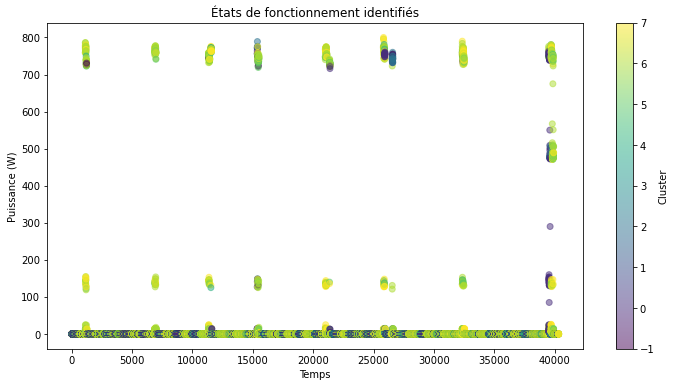

Séquence d'états (premiers 100 états) : [6, 7, 4, 7, 6, 6, 7, 7, 7, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 3, 4, 4, 7, 4, 7, 4, 7, 4, 4, 4, 4, 7, 7, 7, 4, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]


/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


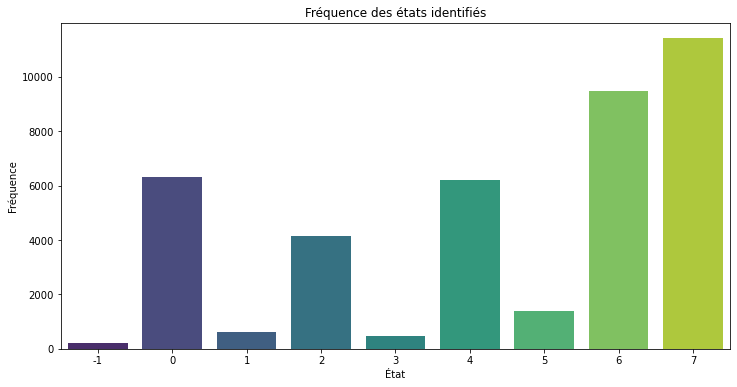

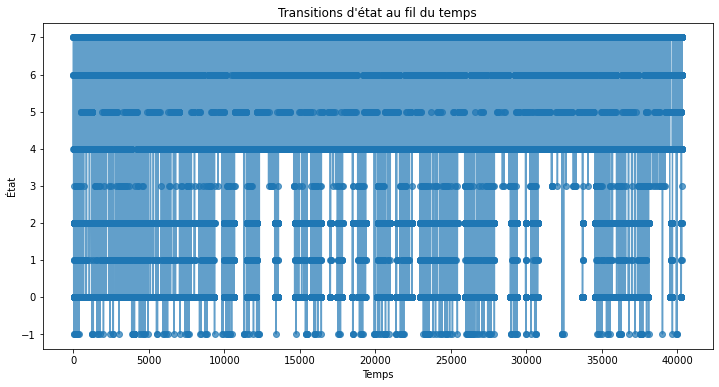

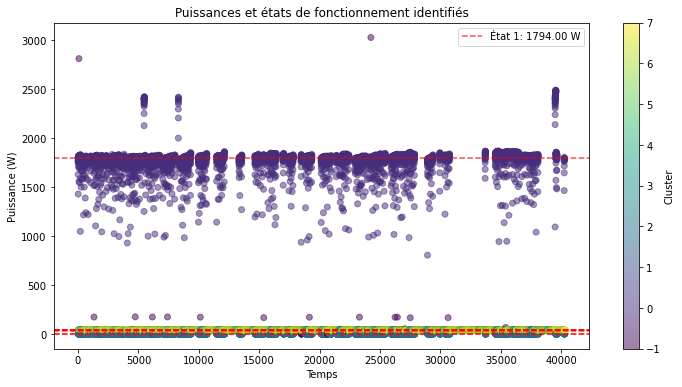

Séquence d'états (premiers 100 états) : [6, 7, 4, 7, 6, 6, 7, 7, 7, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 3, 4, 4, 7, 4, 7, 4, 7, 4, 4, 4, 4, 7, 7, 7, 4, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]


In [39]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('ampds.csv')

# Vérification du chargement des données
print(data.head())

# Préparation des données
# Reshape des données pour qu'elles soient au format attendu par HDBSCAN (n_samples, n_features)
X = data['HPE'].values.reshape(-1, 1)

# Application de HDBSCAN
clusterer = HDBSCAN(min_cluster_size=400, min_samples=100)
cluster_labels = clusterer.fit_predict(X)

# Analyse des clusters
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Nombre d'états identifiés : {n_clusters}")

# Extraction des séquences de puissances
power_states = []
for i in range(n_clusters):
    cluster_power = X[cluster_labels == i]
    power_states.append(np.median(cluster_power))

# Affichage des puissances effectives des états
print("Puissances effectives des états :")
for i, power in enumerate(power_states):
    print(f"État {i+1}: {power:.2f} W")

# Visualisation
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['DWE'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('États de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


# Histogramme des états
plt.figure(figsize=(12, 6))
sns.countplot(cluster_labels, palette='viridis')
plt.title('Fréquence des états identifiés')
plt.xlabel('État')
plt.ylabel('Fréquence')
plt.show()

# Visualisation des transitions d'état
plt.figure(figsize=(12, 6))
plt.plot(data.index, cluster_labels, marker='o', linestyle='-', alpha=0.7)
plt.title('Transitions d\'état au fil du temps')
plt.xlabel('Temps')
plt.ylabel('État')
plt.show()

# Visualisation combinée des puissances et des états
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['HPE'], c=cluster_labels, cmap='viridis', alpha=0.5)
for i, power in enumerate(power_states):
    plt.axhline(y=power, color='r', linestyle='--', alpha=0.7, label=f'État {i+1}: {power:.2f} W' if i == 0 else "")

plt.title('Puissances et états de fonctionnement identifiés')
plt.xlabel('Temps')
plt.ylabel('Puissance (W)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

# Séquence d'états
state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
print("Séquence d'états (premiers 100 états) :", state_sequence[:100])  # Affiche les 100 premiers états


Nombre d'états identifiés pour FGE : 39
Puissances effectives des états pour FGE :
État 1: 444.00 W
État 2: 211.00 W
État 3: 80.00 W
État 4: 1.00 W
État 5: 0.00 W
État 6: 10.00 W
État 7: 124.00 W
État 8: 125.00 W
État 9: 6.00 W
État 10: 121.00 W
État 11: 126.00 W
État 12: 129.00 W
État 13: 130.00 W
État 14: 131.00 W
État 15: 132.00 W
État 16: 8.00 W
État 17: 7.00 W
État 18: 122.00 W
État 19: 123.00 W
État 20: 127.00 W
État 21: 128.00 W
État 22: 135.00 W
État 23: 153.00 W
État 24: 133.00 W
État 25: 134.00 W
État 26: 143.00 W
État 27: 136.00 W
État 28: 137.00 W
État 29: 138.00 W
État 30: 139.00 W
État 31: 142.00 W
État 32: 148.00 W
État 33: 149.00 W
État 34: 140.00 W
État 35: 141.00 W
État 36: 144.00 W
État 37: 145.00 W
État 38: 146.00 W
État 39: 147.00 W


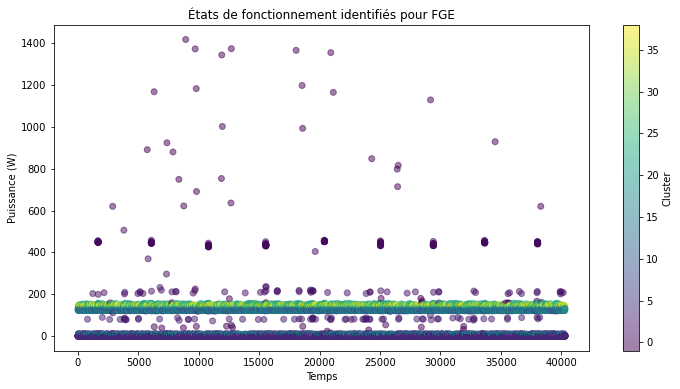

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


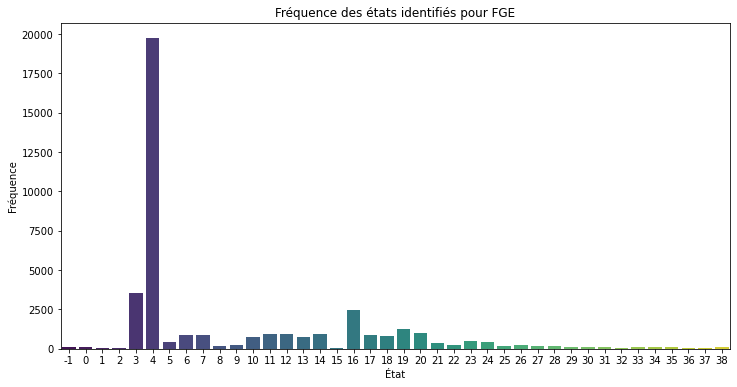

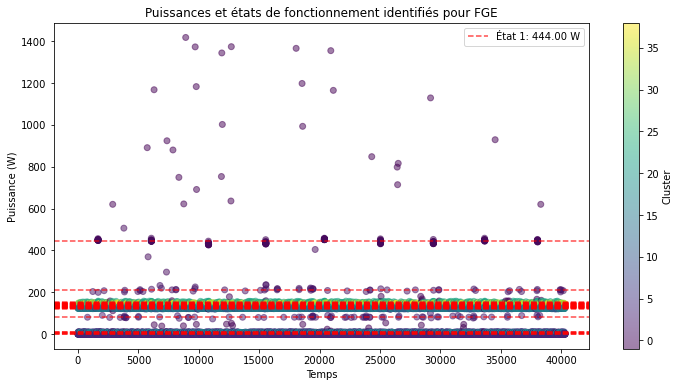

Séquence d'états (premiers 100 états) pour FGE : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 25, 12, 19, 19, 7, 6, 18, 17, 17, 4, 4, 4, 4, 4, 5, -1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 8, 16, 8, 8, 31, 27, 21, 24, 23, 23, 14, 14, 14, 13, 12, 12, 12, 12, 11, 11, 16, 16, 16, 16, 16, 16, 16, 16, 5, 31, 21, 13, 11, 12, 20, 19, 6, 18, 17, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4]
Nombre d'états identifiés pour HPE : 71
Puissances effectives des états pour HPE :
État 1: 2412.00 W
État 2: 41.00 W
État 3: 36.00 W
État 4: 37.00 W
État 5: 0.00 W
État 6: 1.00 W
État 7: 34.00 W
État 8: 35.00 W
État 9: 39.00 W
État 10: 38.00 W
État 11: 1608.00 W
État 12: 1655.00 W
État 13: 1689.00 W
État 14: 1760.00 W
État 15: 1752.00 W
État 16: 1857.00 W
État 17: 1727.00 W
État 18: 1736.00 W
État 19: 1744.00 W
État 20: 1848.00 W
État 21: 1721.00 W
État 22: 1713.00 W
État 23: 1832.00 W
État 24: 1839.00 W
État 25: 1767.00 W
État 26: 1779.00 W
État 27: 1771.00 W
État 28: 1770.00 W
État 29: 1773.00 W
Éta

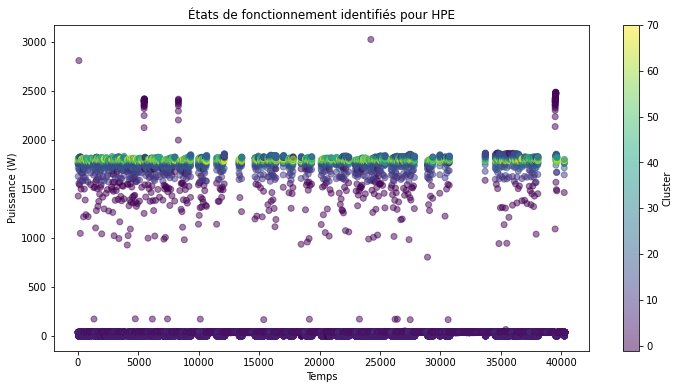

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


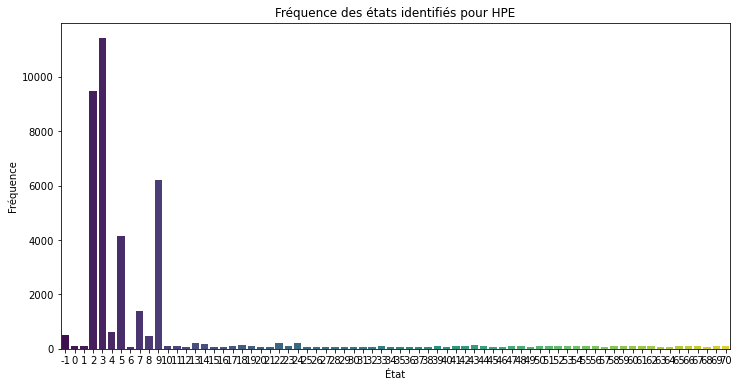

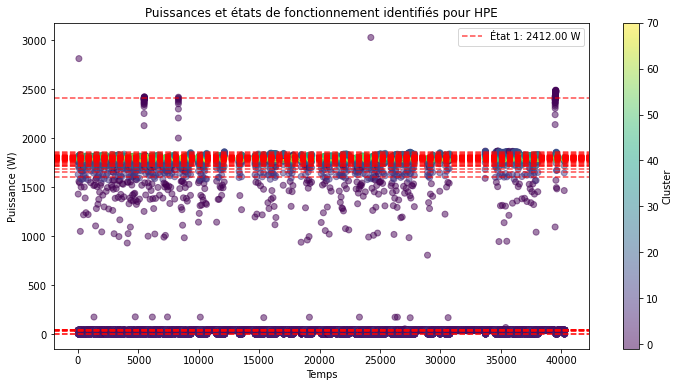

Séquence d'états (premiers 100 états) pour HPE : [2, 3, 9, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, -1, 10, 20, 14, 28, 13, 13, 26, 46, 63, 67, 59, 41, 61, 60, 53, 69, 62, 62, 70, 55, 37, 36, 36, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 8, 9, 9, 3, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 9, 9, -1, -1, 12, 14, 45, 14, 13, 34, 64, 57, 59, 60, 60, 53, 62, 66, 55, 47, 48, 29, 38, 49, 50, 39, 50, 49, 5, 5, 5]
Nombre d'états identifiés pour BME : 32
Puissances effectives des états pour BME :
État 1: 0.00 W
État 2: 434.00 W
État 3: 33.00 W
État 4: 8.00 W
État 5: 6.00 W
État 6: 7.00 W
État 7: 27.00 W
État 8: 25.00 W
État 9: 26.00 W
État 10: 401.00 W
État 11: 324.00 W
État 12: 325.00 W
État 13: 321.00 W
État 14: 323.00 W
État 15: 328.00 W
État 16: 326.00 W
État 17: 327.00 W
État 18: 332.00 W
État 19: 334.00 W
État 20: 333.00 W
État 21: 337.00 W
État 22: 338.00 W
État 23: 339.00 W
État 24: 329.00 W
État 25: 336.00 W
État 26: 335.00 W
État 27: 331.00 W
État 28: 330.00 W
État 29: 366.00 W
État 30: 374.00 

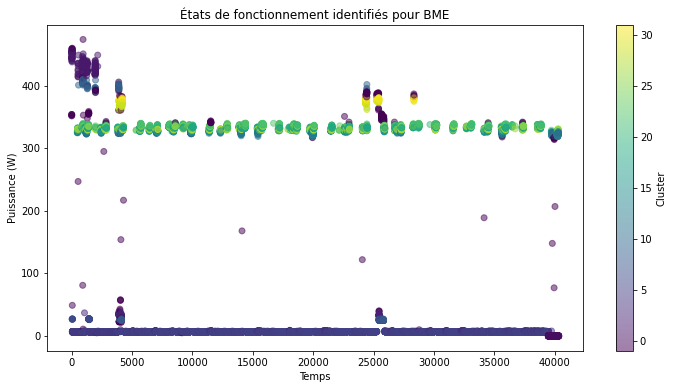

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


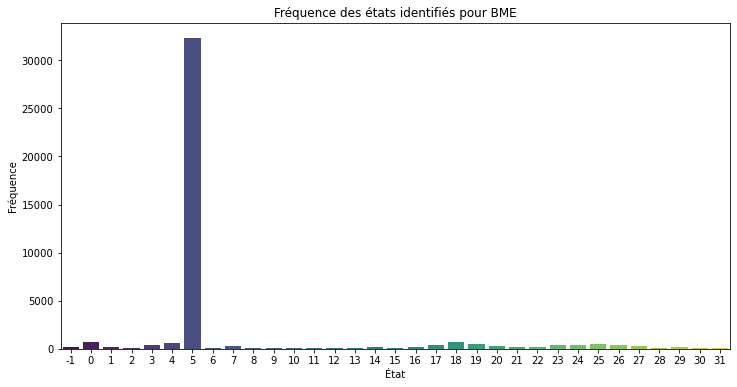

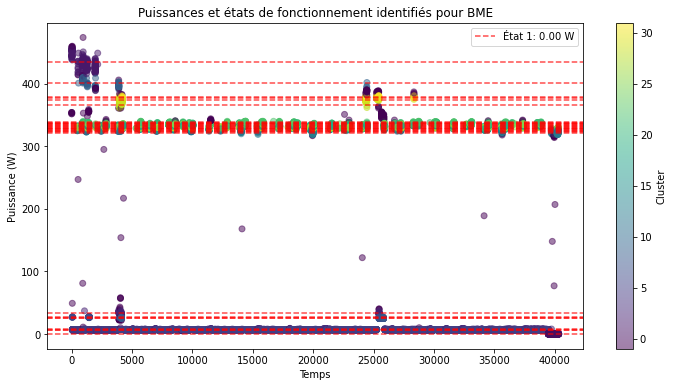

Séquence d'états (premiers 100 états) pour BME : [-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5]
Nombre d'états identifiés pour DWE : 9
Puissances effectives des états pour DWE :
État 1: 753.00 W
État 2: 478.00 W
État 3: 138.00 W
État 4: 7.00 W
État 5: 0.00 W
État 6: 3.00 W
État 7: 2.00 W
État 8: 13.00 W
État 9: 14.00 W


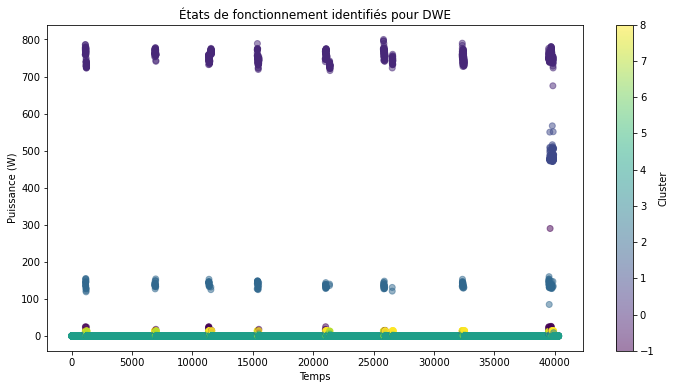

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


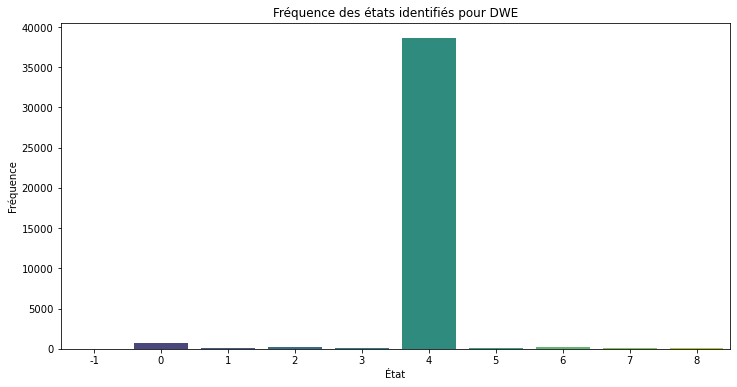

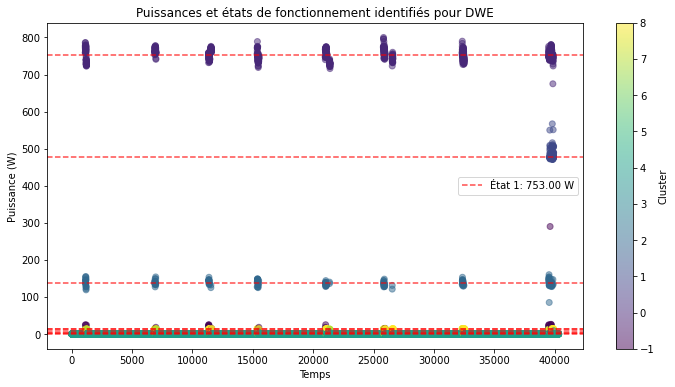

Séquence d'états (premiers 100 états) pour DWE : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Nombre d'états identifiés pour UTE : 7
Puissances effectives des états pour UTE :
État 1: 10.00 W
État 2: 51.00 W
État 3: 52.00 W
État 4: 49.00 W
État 5: 50.00 W
État 6: 8.00 W
État 7: 9.00 W


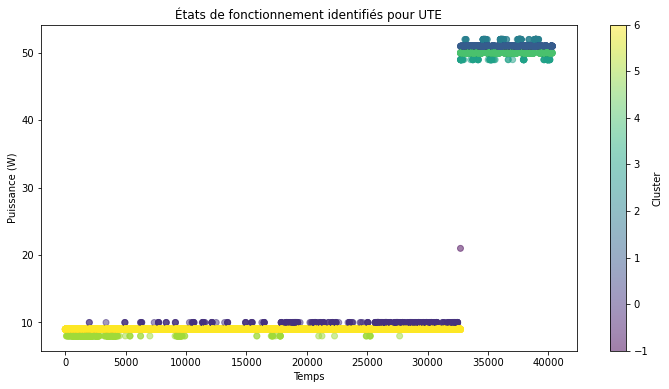

/home/leonce/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


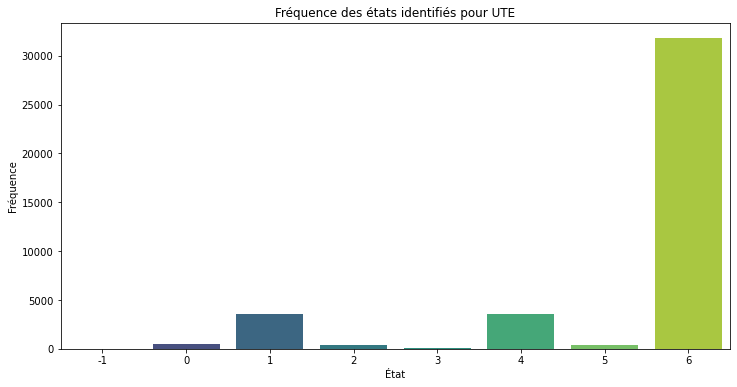

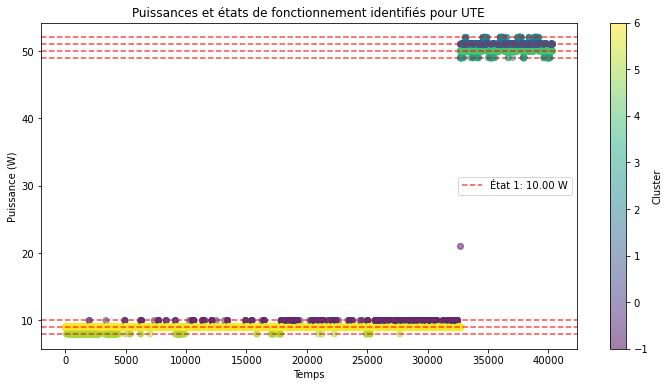

Séquence d'états (premiers 100 états) pour UTE : [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6]


In [48]:
import numpy as np
import pandas as pd
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('ampds.csv')

# Liste des appareils à traiter
appareils = ['FGE', 'HPE', 'BME', 'DWE', 'UTE']

# Fonction pour clustering et affichage des résultats pour un appareil donné
def cluster_and_visualize(data, appareil):
    # Préparation des données
    X = data[appareil].values.reshape(-1, 1)
    
    # Application de HDBSCAN
    clusterer = HDBSCAN(min_cluster_size=50, min_samples=10)
    cluster_labels = clusterer.fit_predict(X)

    # Analyse des clusters
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    print(f"Nombre d'états identifiés pour {appareil} : {n_clusters}")

    # Extraction des séquences de puissances
    power_states = []
    for i in range(n_clusters):
        cluster_power = X[cluster_labels == i]
        power_states.append(np.median(cluster_power))

    # Affichage des puissances effectives des états
    print(f"Puissances effectives des états pour {appareil} :")
    for i, power in enumerate(power_states):
        print(f"État {i+1}: {power:.2f} W")

    # Visualisation
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data[appareil], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title(f'États de fonctionnement identifiés pour {appareil}')
    plt.xlabel('Temps')
    plt.ylabel('Puissance (W)')
    plt.colorbar(label='Cluster')
    plt.show()

    # Histogramme des états
    plt.figure(figsize=(12, 6))
    sns.countplot(cluster_labels, palette='viridis')
    plt.title(f'Fréquence des états identifiés pour {appareil}')
    plt.xlabel('État')
    plt.ylabel('Fréquence')
    plt.show()

    # Visualisation combinée des puissances et des états
    plt.figure(figsize=(12, 6))
    plt.scatter(data.index, data[appareil], c=cluster_labels, cmap='viridis', alpha=0.5)
    for i, power in enumerate(power_states):
        plt.axhline(y=power, color='r', linestyle='--', alpha=0.7, label=f'État {i+1}: {power:.2f} W' if i == 0 else "")

    plt.title(f'Puissances et états de fonctionnement identifiés pour {appareil}')
    plt.xlabel('Temps')
    plt.ylabel('Puissance (W)')
    plt.legend()
    plt.colorbar(label='Cluster')
    plt.show()

    # Séquence d'états
    state_sequence = [cluster_labels[i] for i in range(len(cluster_labels))]
    print(f"Séquence d'états (premiers 100 états) pour {appareil} :", state_sequence[:100])  # Affiche les 100 premiers états

# Itération sur les appareils
for appareil in appareils:
    cluster_and_visualize(data, appareil)


In [49]:
import pandas as pd
import os
from math import floor

# Function for searching working states
def adaptive_function(power_sequence, threshold_ratio):
    d = {}
    for power in power_sequence:
        x = floor(power)
        d[x] = d.get(x, 0) + 1
    
    sorted_keys = sorted(d.keys())
    peaks = []
    for i in range(1, len(sorted_keys) - 1):
        if d[sorted_keys[i]] > d[sorted_keys[i-1]] and d[sorted_keys[i]] > d[sorted_keys[i+1]]:
            peaks.append(sorted_keys[i])
    
    filtered_peaks = [peaks[0]]
    for i in range(1, len(peaks)):
        if peaks[i] - filtered_peaks[-1] > threshold_ratio * max(power_sequence):
            filtered_peaks.append(peaks[i])
    
    K = len(filtered_peaks)
    return filtered_peaks, K

# Path to the AMPDS dataset
dataset_path = "ampds.csv"

# List of appliances in AMPDS
appliances = ['FGE', 'HPE', 'BME', 'DWE', 'UTE']

# Load the AMPDS dataset
data = pd.read_csv(dataset_path)

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['appliance', 'power_sequence', 'num_working_states'])

for appliance in appliances:
    # Select the power sequence for the current appliance
    power_sequence = data[appliance].tolist()
    
    # Calculate the fluctuation threshold
    threshold_ratio = 0.2
    
    # Search for adaptive working states
    U, K = adaptive_function(power_sequence, threshold_ratio)
    
    # Append the results to the DataFrame
    new_row = pd.DataFrame({'appliance': [appliance], 'power_sequence': [U], 'num_working_states': [K]})
    results = pd.concat([results, new_row], ignore_index=True)

# Save the results to a CSV file
results.to_csv('results_ampds.csv', index=False)
